## Subplot and windrose plot

The idea of this demonstration is to show how to use windrose within subplots. 
I will give several exemples from that. 

In [3]:
# sphinx_gallery_thumbnail_number = 6
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt


In [4]:
file = "https://gist.githubusercontent.com/weber-s/42ec9588c35e705ed3c7e02ad69fd43c/raw/2865475b1e6c49bf3d624e3fdc63157b7b394719/windspeed_example"

mto = pd.read_csv(file, parse_dates=[0], index_col=[0])
wsp, wdir = 'WindSpeed', 'WindDir'
mto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21240 entries, 2013-10-01 00:00:00 to 2014-12-17 11:30:00
Data columns (total 2 columns):
WindSpeed    21194 non-null float64
WindDir      21194 non-null float64
dtypes: float64(2)
memory usage: 497.8 KB


## pandas approach

An apparently very simple way of making subplots is to use the built-in tools of pandas plot function.

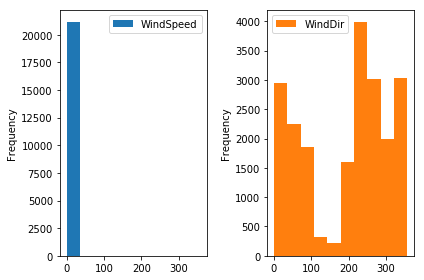

In [10]:
mto.plot(kind='hist', subplots=True, layout=(1, 2))
plt.tight_layout()   # to make it pretty

Adjusting the scale on the x axis of the first subplot requires to be able to access the actual *axes* (do not confuse with axis: *axes* is the object matplotlib uses to describe the axis system onto which data is plotted).

It is not so complicated: any *plot* function returns whatever it plotted to (the *axes*).

Here, *ax* is a 2D-array of 2 *axes*, that can be used to tweek things around (here by adjusting the scale). 

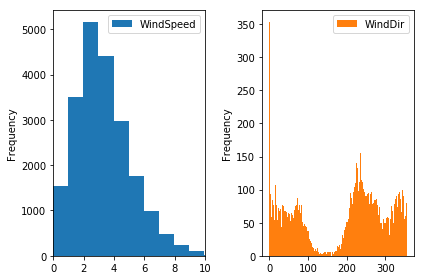

In [11]:
ax = mto.plot(kind='hist', subplots=True, layout=(1, 2), sharex=False, bins= 360)
ax[0, 0].set_xlim(0, 10)
plt.tight_layout()   # to make it pretty

Funny enough, it actually relies on the matplotlib library underneath, so we might as well use matplotlib directly (and on the way understand it a little better).

## matplotlib standard solution

The standard easy way of dealing with subplots in matplotlib is to use the *subplot* fonction which creates and gives access to axes in a set of subplots.

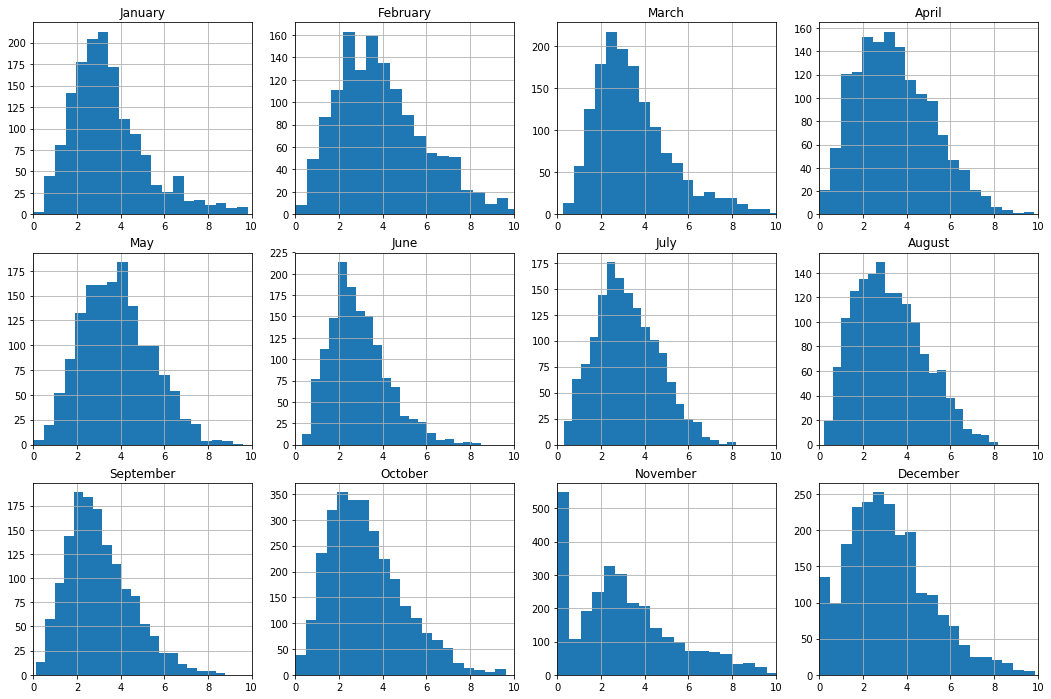

In [12]:
import calendar
mto['month'] = mto.index.month

plt.figure(figsize=(18, 12))

nbcol = 4
nblines = 3

for month, group in mto.groupby('month'):
    ax = plt.subplot(nblines, nbcol, month)
    group[wsp].hist(bins=20, ax=ax)
    ax.set_title(calendar.month_name[month])
    ax.set_xlim(0, 10)


Alas, this solution does not work for windroses, as described in this post: https://stackoverflow.com/questions/42733194/subplot-of-windrose-in-matplotlib.

So, we'll have to rely on the indicated solution, using specified rectangles.



/home/webersa/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/webersa/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/webersa/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


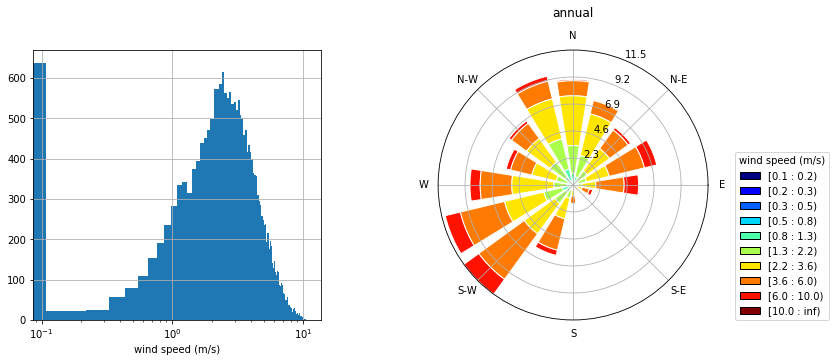

In [13]:
from windrose import WindroseAxes

fig = plt.figure(figsize=(10, 5))

left_rectangle = [0, 0.1, 0.4, 0.75]     # [left, bottom, width, height] as a fraction of total figure size
ax1 = fig.add_axes(left_rectangle)    # creates the axes of specified dimensions 

mto[wsp].hist(bins=100)
ax1.set_xscale("log")
ax1.set_xlabel("wind speed (m/s)")

right_rectangle = [0.5, 0.1, 0.5, 0.75]     # [left, bottom, width, height]
ax = WindroseAxes(fig, right_rectangle)
fig.add_axes(ax)
ax.bar(mto[wdir], mto[wsp], normed=True, opening=0.8, edgecolor='white', bins=np.logspace(-1,1, 10))
ax.set_title("annual", position=(0.5, 1.1))

ax.set_legend()
ax.legend(title="wind speed (m/s)", loc=(1.1, 0))

The numbers around the radar plot indicate frequencies for the given direction. They look quite ugly, and would benefit from some formatting. which is not super trivial:

/home/webersa/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/webersa/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/webersa/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


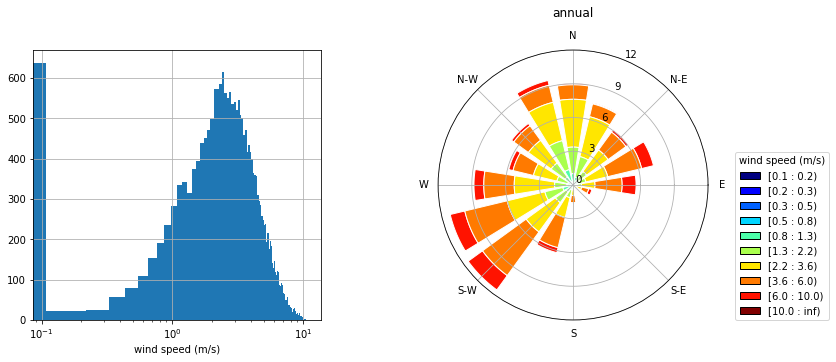

In [14]:
from windrose import WindroseAxes

fig = plt.figure(figsize=(10, 5))

left_rectangle = [0, 0.1, 0.4, 0.75]     # [left, bottom, width, height] as a fraction of total figure size
ax1 = fig.add_axes(left_rectangle)    # creates the axes of specified dimensions 

mto[wsp].hist(bins=100)
ax1.set_xscale("log")
ax1.set_xlabel("wind speed (m/s)")

right_rectangle = [0.5, 0.1, 0.5, 0.75]     # [left, bottom, width, height]
ax = WindroseAxes(fig, right_rectangle)
fig.add_axes(ax)
ax.bar(mto[wdir], mto[wsp], normed=True, opening=0.8, edgecolor='white', bins=np.logspace(-1, 1, 10))
ax.set_title("annual", position=(0.5, 1.1))

ax.set_legend()
ax.legend(title="wind speed (m/s)", loc=(1.1, 0))

#used to pretty up the printing around of wind occurenc frequencies
import matplotlib.ticker as tkr

ax.set_yticks(np.arange(0, 15, 3))
ax.yaxis.set_major_formatter(tkr.FormatStrFormatter('%2.0f'))

If now we want to combine subplots for windroses (using rectangles as shown above) and monthly averages (or any kind of grouping), then we'll want to create a grid of rectangles defining subplots. 

This is the role of *gridspec* in the matplotlib library.

/home/webersa/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/webersa/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/webersa/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


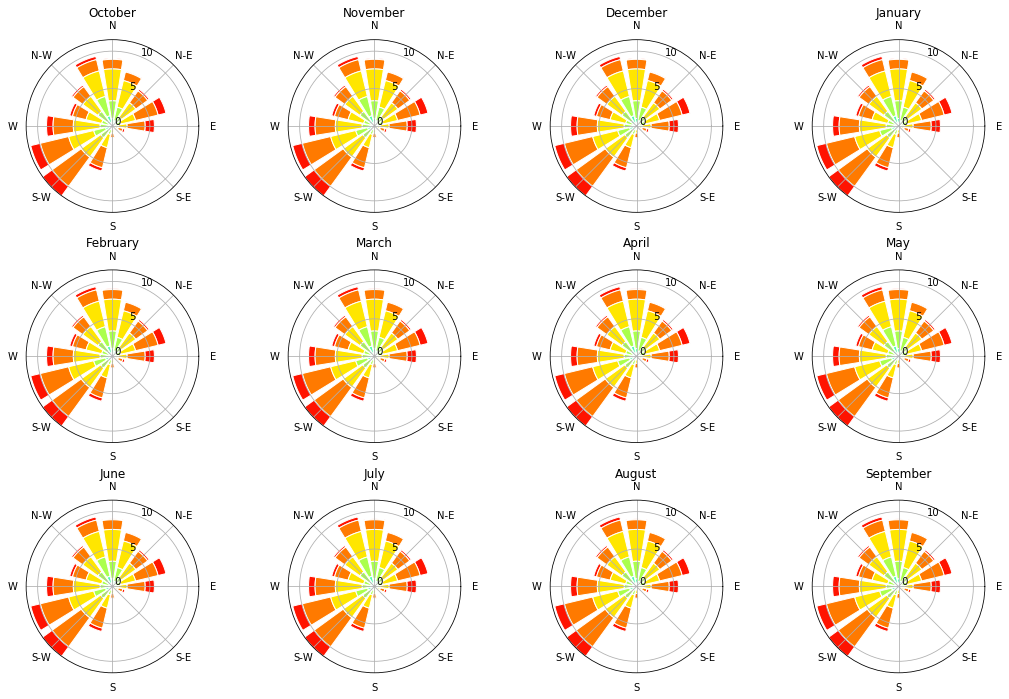

In [15]:
from windrose import WindroseAxes
import matplotlib.ticker as tkr

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 12))

gs = gridspec.GridSpec(3, 4)     # (nblines, nbcol)
# return lists of bottom and top position of rows, left and right positions of columns.
bottom, top, left, right = gs.get_grid_positions(fig)  # [bottom, top, left, right]

for month, m in mto.groupby('month'):
    month = int(month)
    row, col = ((month+2)//4)%3 , (month+2)%4
    
    rect = [left[col],
            bottom[row],
            right[col]-left[col],
            0.9*(top[row]-bottom[row])]     # [left, bottom, width, height]
    
    ax = WindroseAxes(fig, rect)
    fig.add_axes(ax)
    ax.bar(mto[wdir], mto[wsp], normed=True, opening=0.8, edgecolor='white', bins=np.logspace(-1, 1, 10))
    ax.set_title(calendar.month_name[month], position=(0.5, 1.1))

    #used to pretty up the printing around of wind occurenc frequencies

    ax.set_yticks(np.arange(0, 15, 5))
    ax.yaxis.set_major_formatter(tkr.FormatStrFormatter('%2.0f'))

## What's left ? 

Ideally, there should be a common wind scale for all the windroses, somewhere on the right...

And ideally again, the suggestion of defining windroses as a particular projection of matplotlib (see https://stackoverflow.com/questions/42733194/subplot-of-windrose-in-matplotlib) would be a good thing altogether (but it's in the hands of the package's owner).

